# Beamforming: Tapped Delay and Sum

In [38]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import signal

mpl.style.use('bmh')

## Sonar Linear Array

### Beam Pattern - Single Frequency

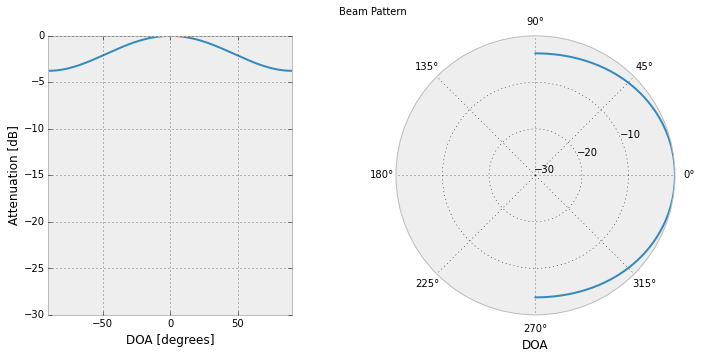

In [96]:
array_angles = np.arange(-90, 91, 1) # in degrees
sound_speed = 1482.0 # meter per second
nsensors = 20
Lsensor = 0.0214 # in meters
beampattern = np.zeros(array_angles.shape[0])
freq = 1700
for a, theta in enumerate(array_angles):
    rvalue = 0
    ivalue = 0
    for i in range(nsensors):
        delay = i * Lsensor * np.sin(theta * np.pi / 180.0) / sound_speed
        rvalue = rvalue + np.cos(2*np.pi*freq * delay)
        ivalue = ivalue + np.sin(2*np.pi*freq * delay)
    beampattern[a] = np.sqrt(rvalue**2 + ivalue**2) / nsensors
# Tranform to dB
beampattern = 20 * np.log10(beampattern)
# PLOT
fig = plt.figure(figsize=(12,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[2,3]) 
ax = fig.add_subplot(gs[0])


#plt.subplot(1,2,1)
ax.plot(array_angles, beampattern)
plt.gca().set_ylim([-30,0])
plt.gca().set_xlim([array_angles.min(), array_angles.max()])
plt.xlabel('DOA [degrees]')
plt.ylabel('Attenuation [dB]')

ax = fig.add_subplot(gs[1], polar=True)
#plt.subplot(1,2,2,polar=True)
ax.plot(array_angles*np.pi / 180.0, beampattern)
plt.gca().set_yticks(np.arange(-30,0,10))
ax.set_rmax(0)
ax.set_rmin(-30)
plt.xlabel('DOA')
plt.grid(True)
plt.gcf().suptitle('Beam Pattern')


#### Narrow Band - Beamforming

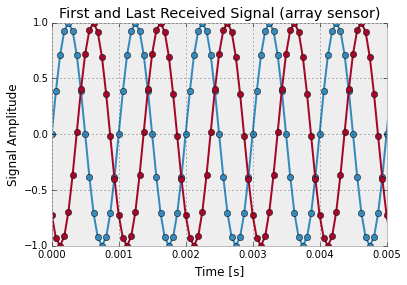

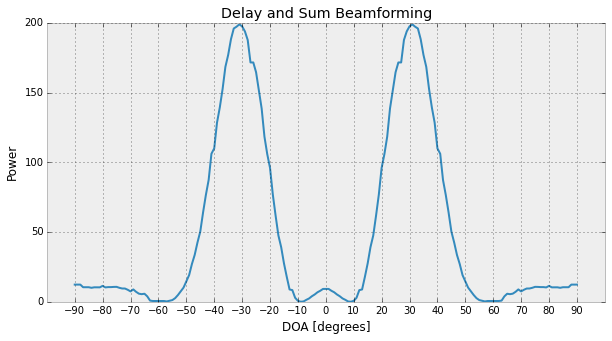

In [15]:
Fs = 16000.
Ts = 1./Fs
# Source signal
nsources = 1
source_angle = np.array([30,45, 60, 75, 80]) # in degrees
source_freqs = np.array([1000,1000, 1000, 1000, 1000]) # Hz
source_ampli = np.array([1, 1, 1, 1, 1])
# Simulate received signal
angle_res = array_angles[1] - array_angles[0]
delay_max = nsensors * Lsensor / sound_speed # considering the angle of 90 degrees, sin = 1
heap_size = int(delay_max * Fs)*2
heap = np.zeros((array_angles.shape[0], heap_size))
beamf = np.zeros(array_angles.shape[0])
total_samples = int(delay_max * Fs)
x_time = np.arange(0, heap_size*Ts, Ts)
received = np.zeros((nsensors, x_time.shape[0]))
for i in range(nsensors):
    for j in range(nsources):
        delay = i * Lsensor * np.sin(source_angle[j] * np.pi / 180.0) / sound_speed # in seconds
        received[i] = received[i] + source_ampli[j] * np.sin((x_time - delay) * 2 * np.pi * source_freqs[j])
plt.figure()
plt.plot(x_time, received[0], '-o')
plt.plot(x_time, received[-1], '-o')
plt.xlim((0,5e-3))
plt.xlabel('Time [s]')
plt.ylabel('Signal Amplitude')
plt.title('First and Last Received Signal (array sensor)')       

# BEAMFORMING
for iang, ang in enumerate(array_angles):
    summed_signal = np.zeros(total_samples)
    for i in range(nsensors):
        delay = i * Lsensor * np.sin(ang * np.pi / 180.0) / sound_speed
        delay_samples = np.abs(int(delay * Fs))
        summed_signal = summed_signal + received[i][delay_samples:delay_samples+total_samples]
    beamf[iang] = summed_signal.dot(summed_signal)/float(total_samples)
plt.figure(figsize=(10,5))
plt.plot(array_angles, beamf)
plt.xticks(array_angles[::10])
plt.ylabel('Power')
plt.xlabel('DOA [degrees]')
plt.title('Delay and Sum Beamforming')

#### Wide Band - Beamforming

In [157]:
Fs = 40000.
Ts = 1./Fs
# Source signal (white noise limited)
nsources = 1
source_angle = np.array([30]) # in degrees
source_freqs = np.array([[10, 3000, 10],[]]) # [Freq min, Freq max, Freq res]
# Simulate received signal
angle_res = array_angles[1] - array_angles[0]
delay_max = nsensors * Lsensor / sound_speed # considering the angle of 90 degrees, sin = 1
heap_size = int(delay_max * Fs)*2
heap = np.zeros((array_angles.shape[0], heap_size))
beamf = np.zeros(array_angles.shape[0])
total_samples = int(delay_max * Fs)
x_time = np.arange(0, heap_size*Ts, Ts)
source_ampli = np.random.rand(nsources, x_time.shape[0])*2 -1 
received = np.zeros((nsensors, x_time.shape[0]))
#white gaussian noise
r_noise = np.random.normal(0, 1, (nsources, x_time.shape[0]))
for j in range(nsources):
    # Filter
    fir = signal.firwin(50, [source_freqs[j][0], source_freqs[j][1]], pass_zero=False, nyq = Fs)
    noise = np.convolve(r_noise[j], fir, mode='same')
    # Over sensors. Delay the noise and add to the sensor.
    
    
raise(Exception())


for i in range(nsensors):
    for j in range(nsources):
        delay = i * Lsensor * np.sin(source_angle[j] * np.pi / 180.0) / sound_speed # in seconds
        
        
        for freq in np.arange(source_freqs[j][0], source_freqs[j][1]+source_freqs[j][2], source_freqs[j][2]):
            received[i] = received[i] + np.random.rand(x_time.shape[0]) * np.sin((x_time - delay) * 2 * np.pi * freq)
plt.figure()
plt.plot(x_time, received[0], '-o')
#plt.plot(x_time, received[-1], '-o')
plt.xlim((0,5e-3))
plt.xlabel('Time [s]')
plt.ylabel('Signal Amplitude')
plt.title('First and Last Received Signal (array sensor)')       

# BEAMFORMING
for iang, ang in enumerate(array_angles):
    summed_signal = np.zeros(total_samples)
    for i in range(nsensors):
        delay = i * Lsensor * np.sin(ang * np.pi / 180.0) / sound_speed
        delay_samples = np.abs(int(delay * Fs))
        summed_signal = summed_signal + received[i][delay_samples:delay_samples+total_samples]
    beamf[iang] = summed_signal.dot(summed_signal)/float(total_samples)
plt.figure(figsize=(10,5))
plt.plot(array_angles, beamf)
plt.xticks(array_angles[::10])
plt.ylabel('Power')
plt.xlabel('DOA [degrees]')
plt.title('Delay and Sum Beamforming')

Exception: 

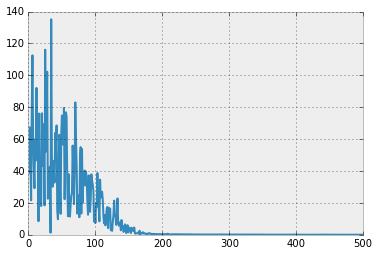

In [163]:
plt.plot(np.abs(np.fft.fft(noise))[:500])

### Beam Pattern - Wide-band

<matplotlib.colorbar.Colorbar instance at 0x129972ef0>

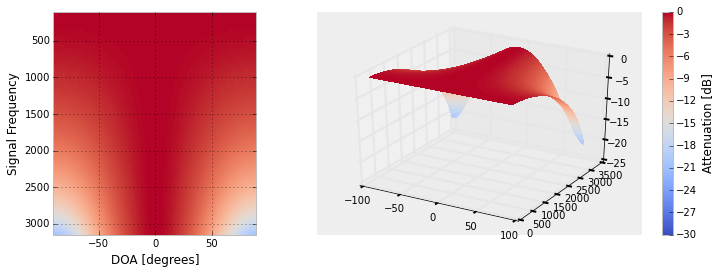

In [97]:
array_angles = np.arange(-90, 90, 1) # in degrees
array_freqs = np.arange(100, 3200, 50) # In Hz
sound_speed = 1482.0 # meter per second
nsensors = 20
Lsensor = 0.0214 # in meters
output = np.zeros((array_angles.shape[0], array_freqs.shape[0]))
for f, freq in enumerate(array_freqs):
    for a, theta in enumerate(array_angles):
        rvalue = 0
        ivalue = 0
        for i in range(nsensors):
            delay = i * Lsensor * np.sin(theta * np.pi / 180.0) / sound_speed
            for j in range(len(array_freqs)):
                rvalue = rvalue + np.cos(2*np.pi*freq * delay)
                ivalue = ivalue + np.sin(2*np.pi*freq * delay)
        output[a, f] = np.sqrt(rvalue**2 + ivalue**2) / nsensors / float(len(array_freqs))
# Tranform to dB
output = 20 * np.log10(output)

fig = plt.figure(figsize=(12,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 4]) 
fig.add_subplot(gs[0])
plt.imshow(output.T, extent=[array_angles.min(), array_angles.max(), array_freqs.max(), array_freqs.min()],
           aspect='auto', vmin = -30, vmax = 0, cmap='coolwarm')
plt.xlabel('DOA [degrees]')
plt.ylabel('Signal Frequency')
ax = fig.add_subplot(gs[1],projection='3d')
X = array_angles
Y = array_freqs
X, Y = np.meshgrid(X, Y)
Z = output.T
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='coolwarm',linewidth=0,
                       antialiased=False, vmin=-30, vmax = 0)
fig.colorbar(surf, label='Attenuation [dB]')